In [1]:
import numpy as np
import tensorflow as tf 
import matplotlib.pyplot as plt 
from kernels import *
import seaborn as sn 
from utils import *
import kernels
from training import *
from search import *

In [2]:
X = np.linspace(0,100,100).reshape(-1, 1)
X = tf.Variable(X)

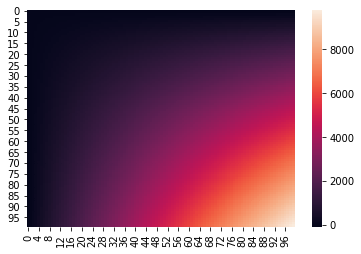

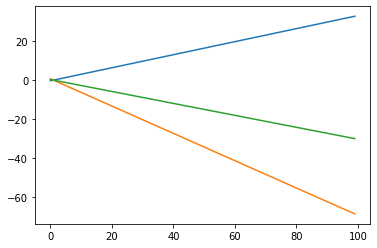

In [3]:
cov = LIN(X,X,[1,1,1]).numpy()
sn.heatmap(cov)
plt.plot
plt.show()
MEANS = []
for i in range(3) :
    mean,_,_=get_values(np.zeros((cov.shape[0])),cov,nb_samples=1)
    MEANS.append(mean)
for i in range(len(MEANS)) :
    plt.plot(MEANS[i])
plt.show()

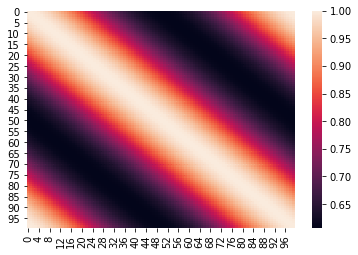

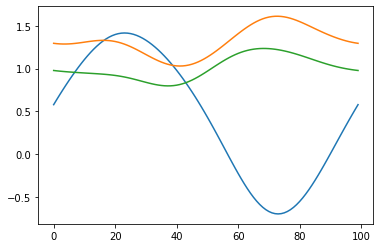

In [4]:
cov = PER(X,X,[1,1,1]).numpy()
sn.heatmap(cov)
plt.plot
plt.show()
MEANS = []
for i in range(3) :
    mean,_,_=get_values(np.zeros((cov.shape[0])),cov,nb_samples=1)
    MEANS.append(mean)
for i in range(len(MEANS)) :
    plt.plot(MEANS[i])
plt.show()

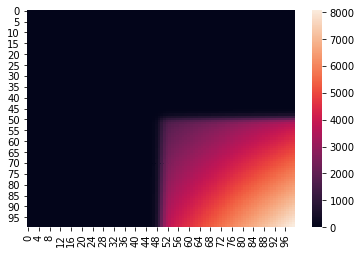

In [11]:
X = np.linspace(0,100,100).reshape(-1, 1)
cov = CP(X,X,[1,50.1],kernels.PER,kernels.LIN,[1,1,1],[10,1,1])
sn.heatmap(cov)
plt.plot
plt.show()

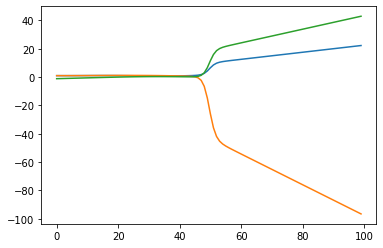

In [12]:
MEANS = []
for i in range(3) :
    mean,_,_=get_values(np.zeros((cov.shape[0])),cov,nb_samples=1)
    MEANS.append(mean)
for i in range(len(MEANS)) :
    plt.plot(MEANS[i])
plt.show()

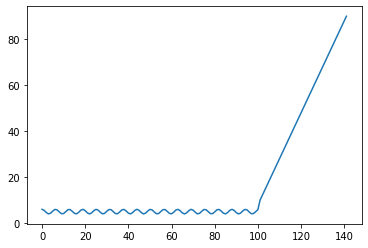

In [13]:
Y = np.append(5+np.cos(np.linspace(0, 100, 101)),2*np.linspace(5, 45, 41)).reshape(-1, 1)
plt.plot(Y)
plt.show()
X_s = np.linspace(0,len(Y)+50,len(Y)+50).reshape(-1, 1)
X = np.linspace(0,len(Y),len(Y)).reshape(-1,1)

You chooosed straightforward training
[STATE]  starting with  [('+LIN',), ('+SE',), ('+PER',), ("CP('+LIN', '+LIN')",), ("CP('+LIN', '+SE')",), ("CP('+LIN', '+PER')",), ("CP('+SE', '+LIN')",), ("CP('+SE', '+SE')",), ("CP('+SE', '+PER')",), ("CP('+PER', '+LIN')",), ("CP('+PER', '+SE')",), ("CP('+PER', '+PER')",)]
=====>............................................| * model is ('+LIN',) 
===========>......................................| * model is ('+SE',) 
================>.................................| * model is ('+PER',) 
======================>...........................| * model is ("CP('+LIN', '+LIN')",) 
===========================>......................| * model is ("CP('+LIN', '+SE')",) 
=================================>................| * model is ("CP('+LIN', '+PER')",) 
======================================>...........| * model is ("CP('+SE', '+LIN')",) 
============================================>.....| * model is ("CP('+SE', '+SE')",) 
 Cholesky decomposition was n

 /home/gregoryscafarto/Bureau/olddir/ABCDflow/utils.py:148: RuntimeWarning:covariance is not positive-semidefinite.


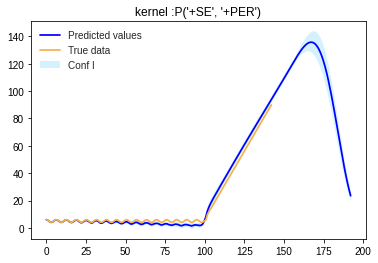

time took: 229.6790063381195 seconds


In [14]:
t0 = time.time()
model,kernel= launch_analysis(X,Y,X_s,straigth=True,do_plot=True,depth=1,verbose=False,initialisation_restart=10,reduce_data=False,experimental_multiprocessing=False,GPY=False,use_changepoint=True) #straight parameters == True
print('time took: {} seconds'.format(time.time()-t0))

In [15]:
model.describe(kernel)

[DESCRIPTION] The signal has 2 componants :
	 A smooth  function with a lengthscale of 0.1 and a variance of 0.9 ,  which apply until  100.2 .
	 A periodic component with a period of 104.6 , a variance of 8707.1 and lengthscale of 1.0 ,  which apply from  100.2.
	 It also has a noise of 0.0 .


In [16]:
model.viewVar(kernel)


 Parameters of  : ["CP('+SE', '+PER')"]
   var name               |               value
   squaredexp_l           |           [0.12000118]
   squaredexp_sigma       |           [0.87181489]
   periodic_l             |           [1.00358276]
   periodic_p             |         [104.58206138]
   periodic_sigma         |        [8707.09162949]
   cp_s                   |           [0.99610462]
   cp_x0                  |         [100.19721713]
   noise                  |               [1.e-08]


All variables  {'squaredexp_l': <tf.Variable 'Variable:0' shape=(1,) dtype=float64, numpy=array([0.12000118])>, 'squaredexp_sigma': <tf.Variable 'Variable:0' shape=(1,) dtype=float64, numpy=array([0.87181489])>, 'periodic_l': <tf.Variable 'periodic_l:0' shape=(1,) dtype=float64, numpy=array([1.00358276])>, 'periodic_p': <tf.Variable 'periodic_p:0' shape=(1,) dtype=float64, numpy=array([104.58206138])>, 'periodic_sigma': <tf.Variable 'periodic_sigma:0' shape=(1,) dtype=float64, numpy=array([8707.09162949])>, 'cp_s': <tf.Variable 'Variable:0' shape=(1,) dtype=float64, numpy=array([0.99610462])>, 'cp_x0': <tf.Variable 'Variable:0' shape=(1,) dtype=float64, numpy=array([100.19721713])>, 'noise': <tf.Variable 'noise:0' shape=(1,) dtype=float64, numpy=array([1.e-08])>}


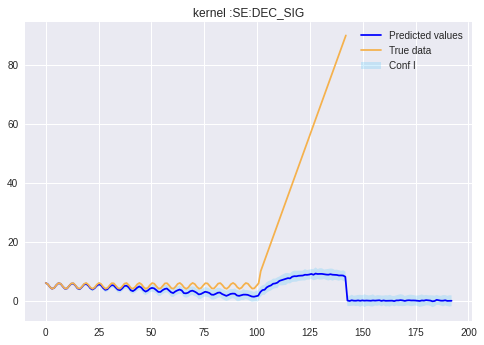

 /home/gregoryscafarto/Bureau/olddir/ABCDflow/utils.py:148: RuntimeWarning:covariance is not positive-semidefinite.


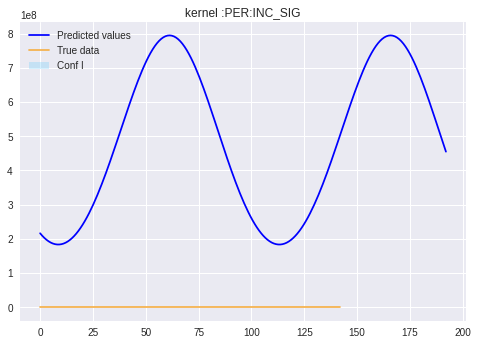

In [17]:
model.decompose(kernel,X,Y,X_s)

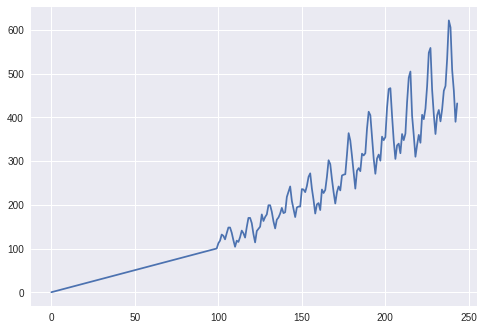

In [22]:
Y = np.append(np.linspace(0,100,100),np.array(pd.read_csv("./data/periodic.csv")["x"][:300])).reshape(-1,1)
X_s = np.linspace(0,len(Y)+50,len(Y)+50).reshape(-1, 1)
X = np.linspace(0,len(Y)-1,len(Y)).reshape(-1,1)
plt.plot(Y)
plt.show()

In [23]:
t0 = time.time()
model,kernel= launch_analysis(X,Y,X_s,straigth=True,do_plot=True,depth=2,verbose=True,initialisation_restart=10,experimental_multiprocessing=True,use_changepoint=True) #straight parameters == True
print('time took: {} seconds'.format(time.time()-t0))

You chooosed straightforward training
This is experimental, the speed may varie a lot !
[STATE]  starting with  [('+LIN',), ('+SE',), ('+PER',), ("CP('+LIN', '+LIN')",), ("CP('+LIN', '+SE')",), ("CP('+LIN', '+PER')",), ("CP('+SE', '+LIN')",), ("CP('+SE', '+SE')",), ("CP('+SE', '+PER')",), ("CP('+PER', '+LIN')",), ("CP('+PER', '+SE')",), ("CP('+PER', '+PER')",)]
[INTERMEDIATE RESULTS]  The best model is ["CP('+LIN', '+LIN')"] at layer 1
[STATE]  The best model is ["CP('+LIN', '+LIN')"] after swap 
[STATE]  Next combinaison to try : [("CP('+LIN', '+LIN')", '*LIN'), ("CP('+LIN', '+LIN')", '*SE'), ("CP('+LIN', '+LIN')", '*PER'), ("CP('+LIN', '+LIN')", '+LIN'), ("CP('+LIN', '+LIN')", '+SE'), ("CP('+LIN', '+LIN')", '+PER')]
[INTERMEDIATE RESULTS]  The best model is ["CP('+LIN', '+LIN')", '+SE'] at layer 2
[STATE]  The best model is ["CP('+LIN', '+LIN')", '+SE'] after swap 

 Parameters of  : ["CP('+LIN', '+LIN')", '+SE']
   var name               |               value
   lin_c               

 /home/gregoryscafarto/Bureau/olddir/ABCDflow/utils.py:148: RuntimeWarning:covariance is not positive-semidefinite.


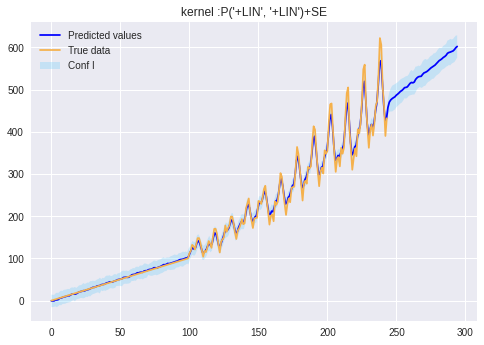

In [24]:
mu,cov = model.predict(X,Y,X_s,kernel)
model.plot(mu,cov,X,Y,X_s,kernel)
plt.show()

In [25]:
model.describe(kernel)

[DESCRIPTION] The signal has 3 componants :
	 A linear component with a offset of 3.8 and a slope of 3.7 ,  which apply until  123.4 .
	 A linear component with a offset of 65.6 and a slope of 68.7 ,  which apply from  123.4.
	 A smooth  function with a lengthscale of 1.0 and a variance of 196.8 .
	 It also has a noise of 147.9 .


All variables  {'lin_c': <tf.Variable 'Variable:0' shape=(1,) dtype=float64, numpy=array([3.80235474])>, 'lin_sigmav': <tf.Variable 'Variable:0' shape=(1,) dtype=float64, numpy=array([3.73277329])>, 'lin_c_2': <tf.Variable 'Variable:0' shape=(1,) dtype=float64, numpy=array([65.63317774])>, 'lin_sigmav_2': <tf.Variable 'Variable:0' shape=(1,) dtype=float64, numpy=array([68.67144209])>, 'cp_s': <tf.Variable 'Variable:0' shape=(1,) dtype=float64, numpy=array([2.19798659])>, 'cp_x0': <tf.Variable 'Variable:0' shape=(1,) dtype=float64, numpy=array([123.42484483])>, 'squaredexp_l': <tf.Variable 'squaredexp_l:0' shape=(1,) dtype=float64, numpy=array([1.])>, 'squaredexp_sigma': <tf.Variable 'squaredexp_sigma:0' shape=(1,) dtype=float64, numpy=array([196.7557659])>, 'noise': <tf.Variable 'noise:0' shape=(1,) dtype=float64, numpy=array([147.89228751])>}


 /home/gregoryscafarto/Bureau/olddir/ABCDflow/utils.py:148: RuntimeWarning:covariance is not positive-semidefinite.


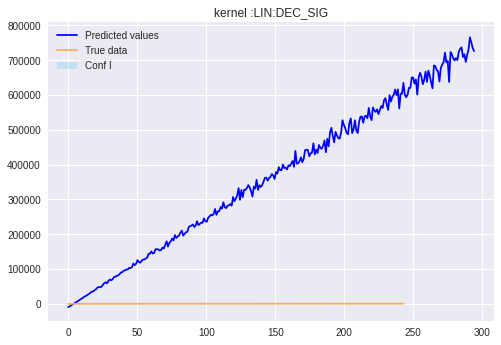

 /home/gregoryscafarto/Bureau/olddir/ABCDflow/utils.py:148: RuntimeWarning:covariance is not positive-semidefinite.


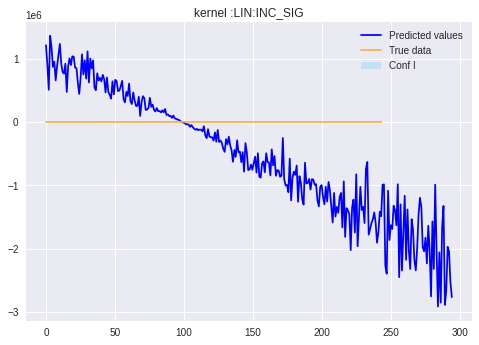

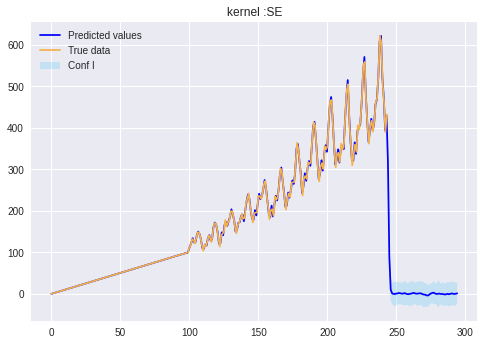

In [26]:
model.decompose(kernel,X,Y,X_s)